# EN4353 - Radar & Navigation

## Assignment 03


* Name: S.Sooriyakumar

* Index No: 170599G

* Department : E.N.T.C

* Batch : 17th

Step1: Download and unzip this github repo: https://github.com/Sooriyakumar23/EN4353-Radar-Navigation/tree/main/Assignment-03

Step2: Open 'Assignment-03' folder

Step3: Run '170599G-Assignment-03.ipynb' using jupyter notebook of anaconda

In [8]:
# Importing necessary libraries

import pandas as pd # To read csv files from local folder to ipynb code file
import numpy as np # To handle arrays and matrices
import matplotlib.pyplot as plt # To plot variety of figures
import seaborn as sns # To plot variety of figures
from google.colab import drive # To access drive to get files

In [9]:
# Load dataset

drive.mount('/content/gdrive')

df = pd.read_csv('/content/dataset.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
df.head(15)

,Sample Number,I-CH,Time,Q CH,ACP
0,-524288,7F7B,-26.214308 ms,FF76,0
1,-524287,7F7B,-26.214258 ms,FF76,0
2,-524286,7F7B,-26.214208 ms,FF76,0
3,-524285,7F7B,-26.214158 ms,FF76,0
4,-524284,7F7B,-26.214108 ms,FF76,0
5,-524283,7F6A,-26.214058 ms,FF77,0
6,-524282,7F6A,-26.214008 ms,FF77,0
7,-524281,7F6A,-26.213958 ms,FF77,0
8,-524280,7F6A,-26.213908 ms,FF77,0
9,-524279,7F6A,-26.213858 ms,FF77,0


# Q1

Preprocessing

* Step1 :- Every consecutive 5 samples are same due to oversampling - Mitigate oversampling

* Step2 :- First 10,650 samples in original signal are errorneous - Needs to be dropped

* Step3 :- I channel has not been biased properly - 4 MSBs '7' have to be converted to 'F'

* Step4 :- Stored in 16-bit 2's complement format hex numbers - Have to change back to signed integers

**Step1 & Step2**

I - component

In [99]:
I_CH_ds = df['I-CH'].to_numpy()[0::5] # Step1

In [100]:
I_CH = I_CH_ds[10650:] # Step2

Q - component

In [101]:
Q_CH_ds = df['Q CH'].to_numpy()[0::5] # Step1

In [102]:
Q_CH = Q_CH_ds[10650:] # Step2

ACP

In [185]:
ACP = df['ACP'].to_numpy()[0::5][10650:]

**Step3**

In [108]:
I_CH_corrected = []

for i in I_CH:
  if str(i)[0] == '7':
    I_CH_corrected.append('F'+str(i)[1:])
  else:
    I_CH_corrected.append(str(i))

**Step4**

In [145]:
##### Hex -> Decimal calculation ; Example :->

# FDFE -> 
# 1111 1101 1111 1110 -> 
# 2 + 4 + 8 + 16 + 32 + 64 + 128 + 256 + 1024 + 2048 + 4096*(1+2+4) - 4096*8 ->
# -514

In [146]:
I_final = []

for j in I_CH_corrected:
  val = int(j, 16)
  if (val & (1 << (16 - 1))) != 0: val = val - (1 << 16)
  I_final.append(val) 

In [147]:
Q_final = []

for k in Q_CH:
  val = int(k, 16)
  if (val & (1 << (16 - 1))) != 0: val = val - (1 << 16)
  Q_final.append(val) 

# Q2

In [166]:
S = np.array(I_final) + 1j*np.array(Q_final)

In [167]:
length = 900*4
data_set = S[:int(len(S)/length)*length].reshape(int(len(S)/length),length)

In [168]:
data_set

array([[ -514.+157.j,  -872.+278.j,  -441. +88.j, ...,  -267. -40.j,
         -180.-220.j, -1026.+417.j],
       [ -528.+186.j,  -952.+346.j,  -462.+110.j, ...,  -187. -70.j,
         -138.-246.j, -1191.+517.j],
       [ -876.+411.j, -1334.+596.j,  -752.+324.j, ...,  -179. -73.j,
          -87.-262.j, -1219.+515.j],
       ...,
       [ -128.-100.j,  -177. -86.j,  -106.-109.j, ...,  -118.-118.j,
         -150. -97.j,  -177. -94.j],
       [  -65.-142.j,   -94.-131.j,  -113.-115.j, ...,  -160.-103.j,
         -104.-114.j,   -72.-153.j],
       [ -121.-113.j,   -75.-136.j,   -74.-131.j, ...,    -6. -73.j,
           -5. -71.j,     3. -88.j]])

1st Pulse

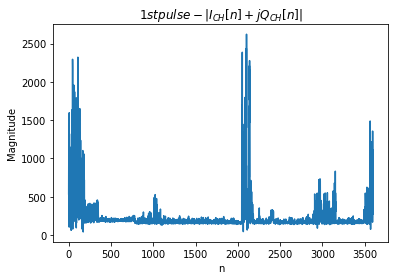

In [169]:
plt.plot(np.abs(data_set[0]))
plt.title('$1st pulse - |I_{CH}[n]+jQ_{CH}[n]|$')
plt.xlabel('n')
plt.ylabel('Magnitude')

plt.show()

20th Pulse

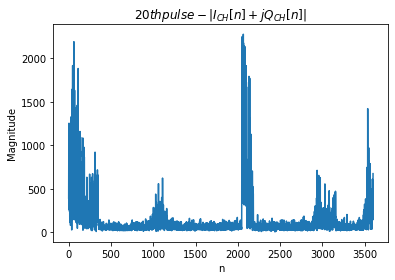

In [171]:
plt.plot(np.abs(data_set[19]))
plt.title('$20th pulse - |I_{CH}[n]+jQ_{CH}[n]|$')
plt.xlabel('n')
plt.ylabel('Magnitude')

plt.show()

# Q3

By, observing the magnitude of the signal **S**, we can say that threshold = 300.

# Q4

In [172]:
# Obtaining clutter map using the decided threshold (300) on the data_set.

In [173]:
threshold = 300

Text(0.5, 1.0, 'Clutter Map - MTD')

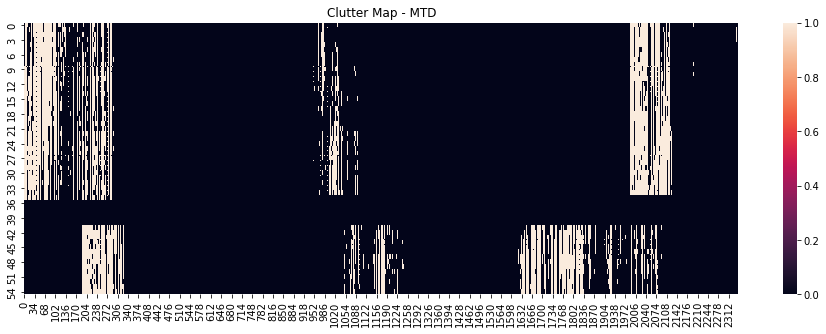

In [183]:
plt.figure(figsize=(16,5))
sns.heatmap(np.abs(data_set[:,56:2400])>threshold)
plt.title('Clutter Map - MTD')

# Q5

**i. RPM of the radar**

RPM = $\frac{60}{Time-taken-for-one-revolution}$
  = $\frac{60}{ACPs-for-one-revolution  \times{}  time-for-one-ACP}$
= $\frac{60}{ACPs-for-one-revolution \times{} samples-per-ACP \times{} sampling-period}$ 
= $\frac{60 \times{} 20 \times{} 10^6}{4096 \times{}22500}$
= 13.02rpm

**ii. Number of echoes per CPI interval**

No. of Echoes per CPI interval = ACPs for CPI x No. of Echoes CPI
= ACPs for CPI x Samples for ACP / samples per Echo
= 32 X (22500) / (5 x 900 x 4)
= 40  

**iii. Beam width of RADAR**

Beam width = ACPs per azimuth bin x resolution of shaft encoder 
= $ 32 \times 360^0 / 4096 $ = $ 2.81^0 $

# Q6

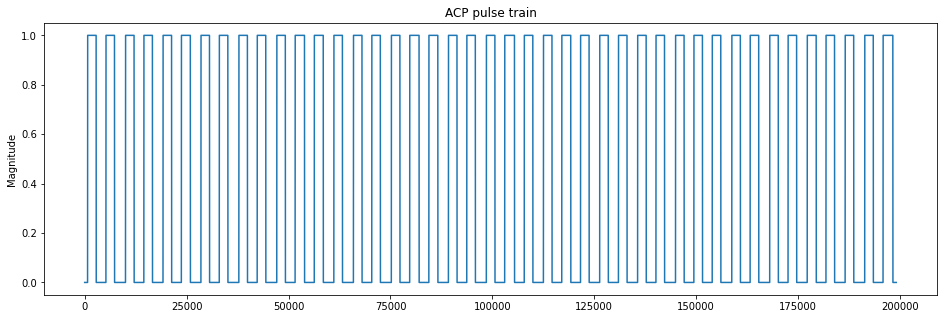

In [189]:
plt.figure(figsize=(16,5))
plt.plot(ACP)
plt.title('ACP pulse train')
plt.ylabel('Magnitude')
plt.show()

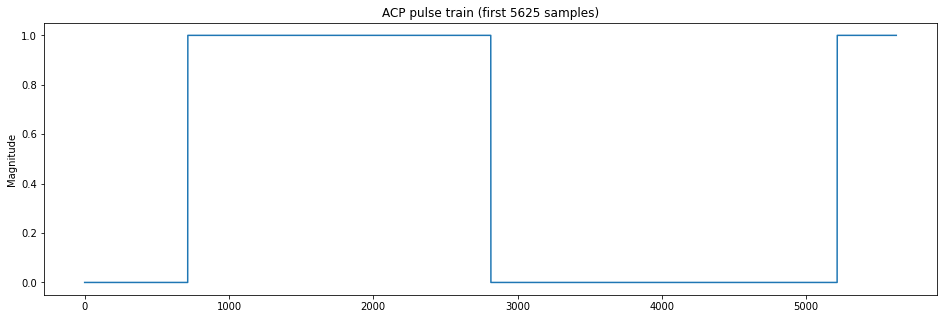

In [190]:
plt.figure(figsize=(16,5))
plt.plot(ACP[:5625])
plt.title('ACP pulse train (first 5625 samples)')
plt.ylabel('Magnitude')
plt.show()

In [196]:
time = np.vectorize(lambda x: x[:len(x)-3:1], otypes=[float])(df['Time'].to_numpy()[::5][10650:])

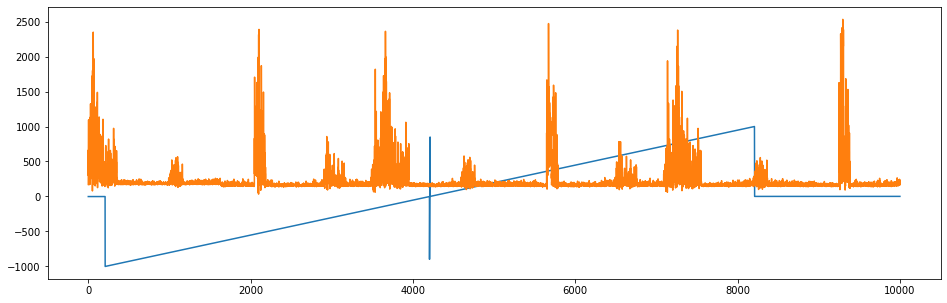

In [197]:
plt.figure(figsize=(16,5))
plt.plot(time[90000:100000])
plt.plot(np.abs(S)[90000:100000])

Clutter Map can be divided into mainly 3 sections. Those are, 

1. **Section 1** = 0-35 in y-axis : This region only contains clutter

2. **Section 2** = 36-40 in y-axis : All the received signals are less than noise threshold. reason for that could be the radar vicinity is not illuminated by the transmitter

3. **Section 3** = 41 - 55 in y-axis : This region is differing from **Section 1**. So, shaft encoder provides pulses with same frequency we can assume that radar is moving at a constant angular velocity.

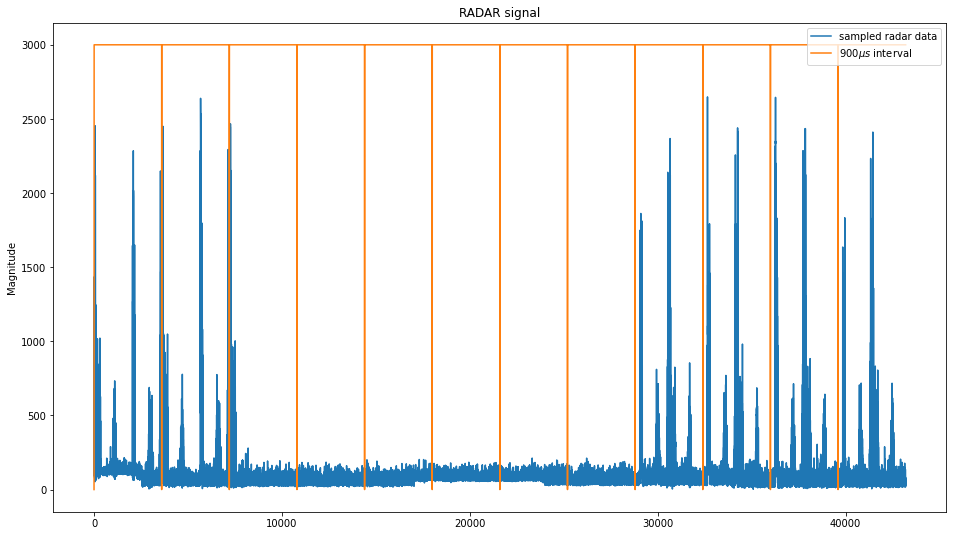

In [200]:
plt.figure(figsize=(16,9))
plt.plot(np.abs(S)[33*3600:45*3600],label='sampled radar data')

echo_pulse = np.zeros(len(S))
for i in range(len(S)):
  if i%3600:echo_pulse[i]=3000

plt.plot(echo_pulse[33*3600:45*3600],label='900$\mu s$ interval')
plt.title('RADAR signal')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.show()

So, tranmitter is turned on in the middle of the 900 us sample interval. This may be the reason for the shift in section C.